## SMS Spam Classifier

In [1]:
import numpy as np
import pandas as pd
import string
from collections import Counter

In [2]:
sms = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
sms.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
sms = sms[['v1','v2']]

In [6]:
sms.columns = ['spam','text']

In [7]:
sms.sample(10)

,spam,text
360,ham,Ha ha cool cool chikku chikku:-):-DB-)
4155,ham,"Yo, call me when you get the chance, a friend ..."
1128,spam,Ur HMV Quiz cash-balance is currently å£500 - ...
5068,ham,Hai dear friends... This is my new &amp; prese...
2970,ham,Height of Confidence: All the Aeronautics prof...
2978,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No..."
3248,ham,"Sorry, I can't help you on this."
1125,spam,For taking part in our mobile survey yesterday...
1721,ham,Am watching house ÛÒ very entertaining ÛÒ am...
4283,ham,Yes. I come to nyc for audiitions and am tryin...


In [8]:
from sklearn.preprocessing import LabelEncoder
sms['spam']=LabelEncoder().fit_transform(sms['spam'])

In [9]:
sms.head(10)

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [10]:
sms.shape

(5572, 2)

In [11]:
sms.isnull().sum()

spam    0
text    0
dtype: int64

In [12]:
sms.duplicated().sum()

403

In [13]:
sms = sms.drop_duplicates(keep='first')
sms

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
sms['spam'].value_counts()

0    4516
1     653
Name: spam, dtype: int64

In [15]:
import matplotlib.pyplot as plt

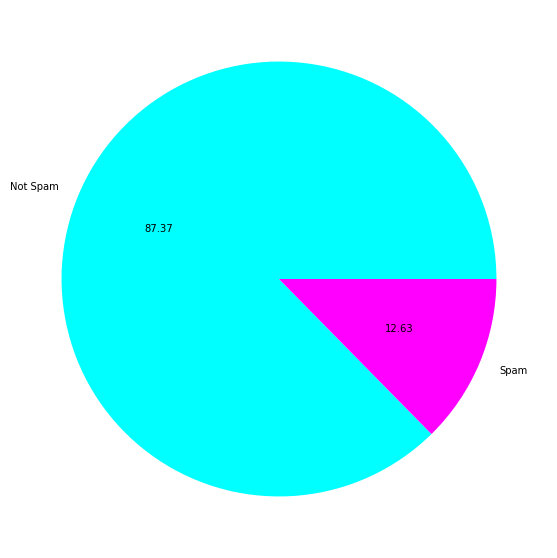

In [16]:
plt.figure(figsize=(10,10))
plt.pie(sms['spam'].value_counts(), labels = ['Not Spam','Spam'], autopct='%0.2f',colors=['Cyan','Magenta'])
plt.show()

In [17]:
sms['number of character'] = sms['text'].apply(len)

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
sms['number of words'] = sms['text'].apply(lambda x: len(nltk.word_tokenize(x)))
sms['number of sentences'] = sms['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
sms.head(10)

,spam,text,number of character,number of words,number of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [21]:
# Not spam data statistics
sms[sms['spam']==0].describe()

,spam,number of character,number of words,number of sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123339,1.815545
std,0.0,56.358207,13.491315,1.364098
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [22]:
# Spam data statistics 
sms[sms['spam']==1].describe()

,spam,number of character,number of words,number of sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.969372
std,0.0,30.137753,7.008418,1.488910
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


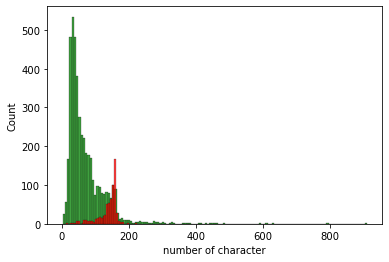

In [23]:
import seaborn as sns
sns.histplot(sms[sms['spam']==0]['number of character'],color='g')
sns.histplot(sms[sms['spam']==1]['number of character'],color='r')
plt.show()

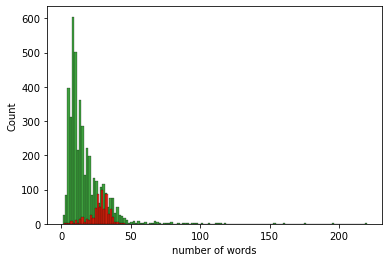

In [24]:
sns.histplot(sms[sms['spam']==0]['number of words'],color='g')
sns.histplot(sms[sms['spam']==1]['number of words'],color='r')
plt.show()

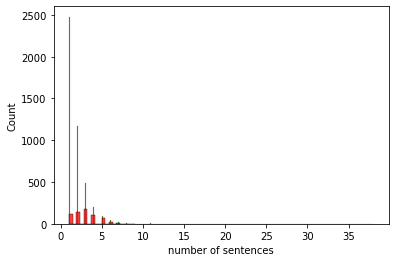

In [25]:
sns.histplot(sms[sms['spam']==0]['number of sentences'],color='g')
sns.histplot(sms[sms['spam']==1]['number of sentences'],color='r')
plt.show()

<AxesSubplot:>

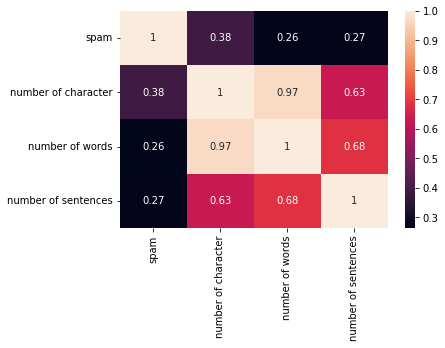

In [26]:
sns.heatmap(sms.corr(),annot=True)

In [27]:
sms['cleaned_text'] = sms['text'].apply(lambda x : ''.join([char for char in x if char not in string.punctuation]))

In [28]:
sms.head()

,spam,text,number of character,number of words,number of sentences,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,Nah I dont think he goes to usf he lives aroun...


In [29]:
# Lets plot wordcloud for spam and not spam messeages
from wordcloud import WordCloud, STOPWORDS

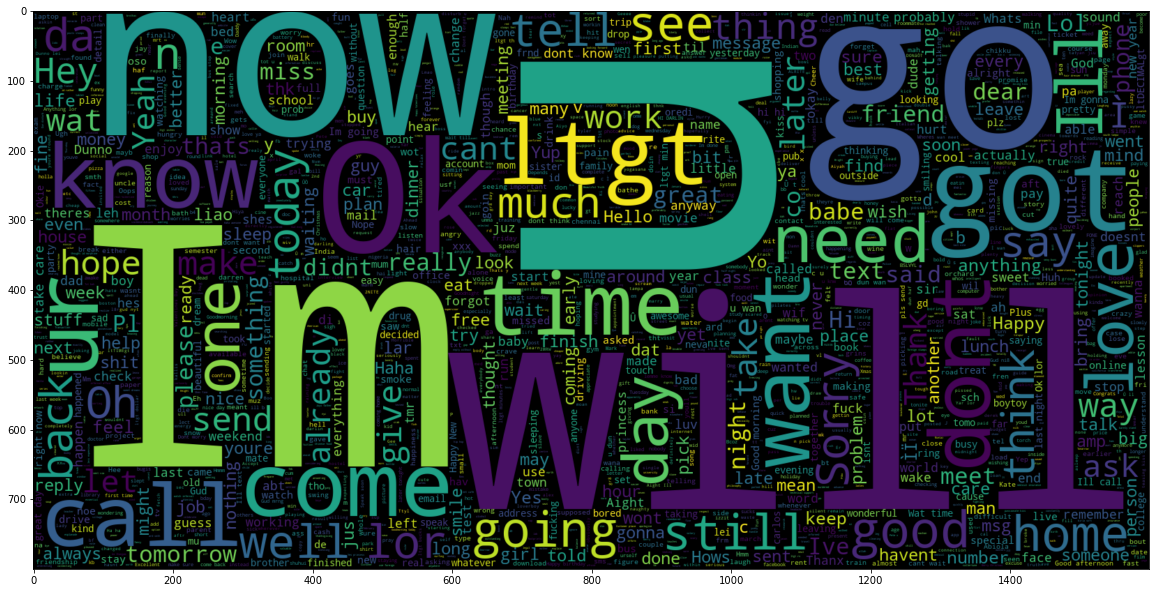

In [30]:
not_spam_text = ' '.join(list(sms[sms['spam']==0]['cleaned_text']))
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,width=1600,height=800).generate(not_spam_text)
plt.imshow(wc,interpolation='bilinear')

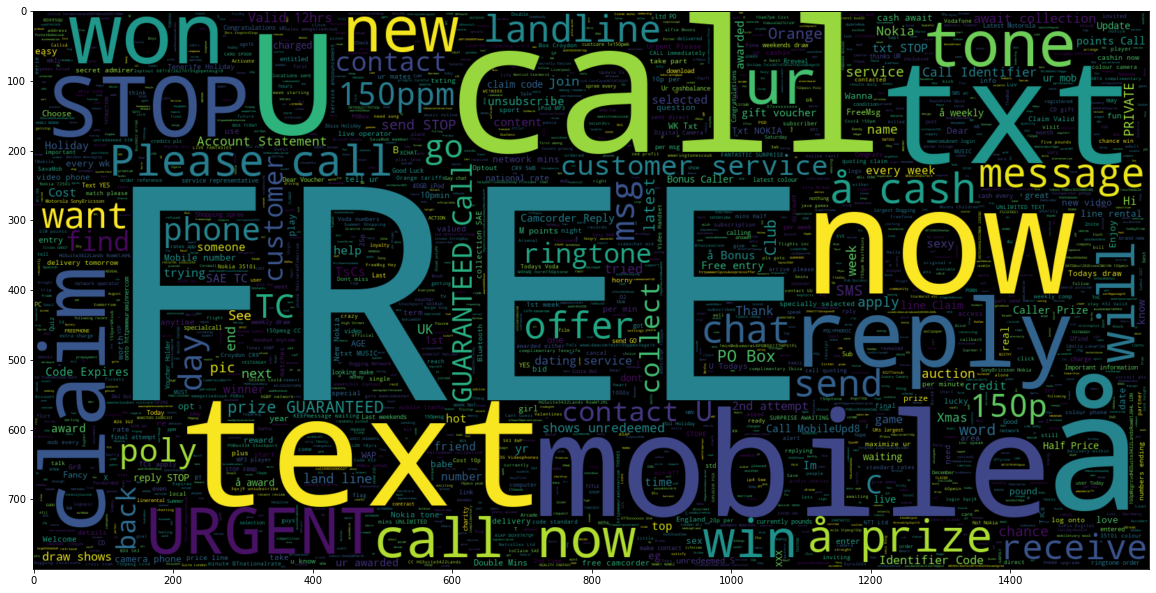

In [31]:
spam_text = ' '.join(list(sms[sms['spam']==1]['cleaned_text']))
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,width=1600,height=800).generate(spam_text)
plt.imshow(wc,interpolation='bilinear')

In [32]:
# text preprocessing 1) remove stop words 2) stemming
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [ PorterStemmer().stem(word) for word in text if word not in stopwords.words('english') ]
    return ' '.join(text)   

In [33]:
transform(sms['cleaned_text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [34]:
sms['cleaned_text'] = sms['cleaned_text'].apply(transform)

In [35]:
sms.head(10)

,spam,text,number of character,number of words,number of sentences,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back id like fun ...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell mell oru minnaminungint nurun...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea å£9...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [36]:
# Lets see top 50 words in not-spam and spam category
not_spam_text

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat Ok lar Joking wif u oni U dun say so early hor U c already then say Nah I dont think he goes to usf he lives around here though Even my brother is not like to speak with me They treat me like aids patent As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertune for all Callers Press 9 to copy your friends Callertune Im gonna be home soon and i dont want to talk about this stuff anymore tonight k Ive cried enough today Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times I HAVE A DATE ON SUNDAY WITH WILL Oh kim watching here Eh u remember how 2 spell his name Yes i did He v naughty make until i v wet Fine if thatåÕs the way u feel ThatåÕs the way its gota b Is that seriously how you spell his name I\x89Û÷m 

In [37]:
spam_text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send å£150 to rcv WINNER As a valued network customer you have been selected to receivea å£900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only Had your mobile 11 months or more U R entitled to Update to the latest colour mobiles with camera for Free Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH From 100 to 20000 pounds txt CSH11 and send to 87575 Cost 150pday 6days 16 TsandCs apply Reply HL 4 info URGENT You have won a 1 week FREE membership in our å£100000 Prize Jackpot Txt the word CLAIM to No 81010 TC wwwdbuknet LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub To use your credit click the WAP link in the next txt message or click here httpwap xxxmobilemovieclubcom

In [38]:
spam_text_without_stopwords = [word for word in nltk.word_tokenize(spam_text.lower()) if word not in stopwords.words('english')]

In [39]:
print(Counter(spam_text_without_stopwords).most_common(50))

[('call', 303), ('free', 188), ('2', 155), ('txt', 126), ('u', 123), ('ur', 119), ('mobile', 105), ('text', 103), ('stop', 103), ('4', 97), ('claim', 96), ('reply', 93), ('prize', 81), ('get', 69), ('new', 64), ('urgent', 58), ('send', 57), ('nokia', 54), ('cash', 51), ('contact', 51), ('service', 48), ('win', 47), ('please', 47), ('phone', 43), ('guaranteed', 42), ('per', 41), ('customer', 40), ('18', 38), ('tone', 38), ('16', 37), ('week', 37), ('chat', 35), ('draw', 33), ('awarded', 31), ('mins', 31), ('line', 31), ('go', 30), ('latest', 29), ('message', 29), ('shows', 29), ('150ppm', 29), ('å£2000', 29), ('landline', 29), ('1', 28), ('å£1000', 28), ('want', 28), ('video', 28), ('receive', 27), ('code', 27), ('holiday', 27)]


In [40]:
not_spam_text_without_stopwords = [word for word in nltk.word_tokenize(not_spam_text.lower()) if word not in stopwords.words('english')]

In [41]:
print(Counter(not_spam_text_without_stopwords).most_common(50))

[('u', 878), ('im', 434), ('get', 295), ('2', 288), ('ltgt', 254), ('ok', 246), ('dont', 242), ('go', 239), ('got', 237), ('know', 221), ('like', 219), ('come', 208), ('ill', 205), ('good', 205), ('ur', 197), ('call', 184), ('time', 181), ('love', 168), ('day', 168), ('going', 162), ('4', 160), ('want', 159), ('lor', 157), ('one', 155), ('need', 152), ('home', 151), ('still', 141), ('see', 133), ('think', 126), ('back', 126), ('da', 124), ('well', 124), ('r', 120), ('sorry', 119), ('n', 118), ('ì', 117), ('tell', 116), ('today', 115), ('hi', 112), ('take', 109), ('oh', 108), ('send', 108), ('much', 108), ('hey', 106), ('cant', 103), ('night', 101), ('later', 99), ('na', 96), ('hope', 96), ('great', 94)]


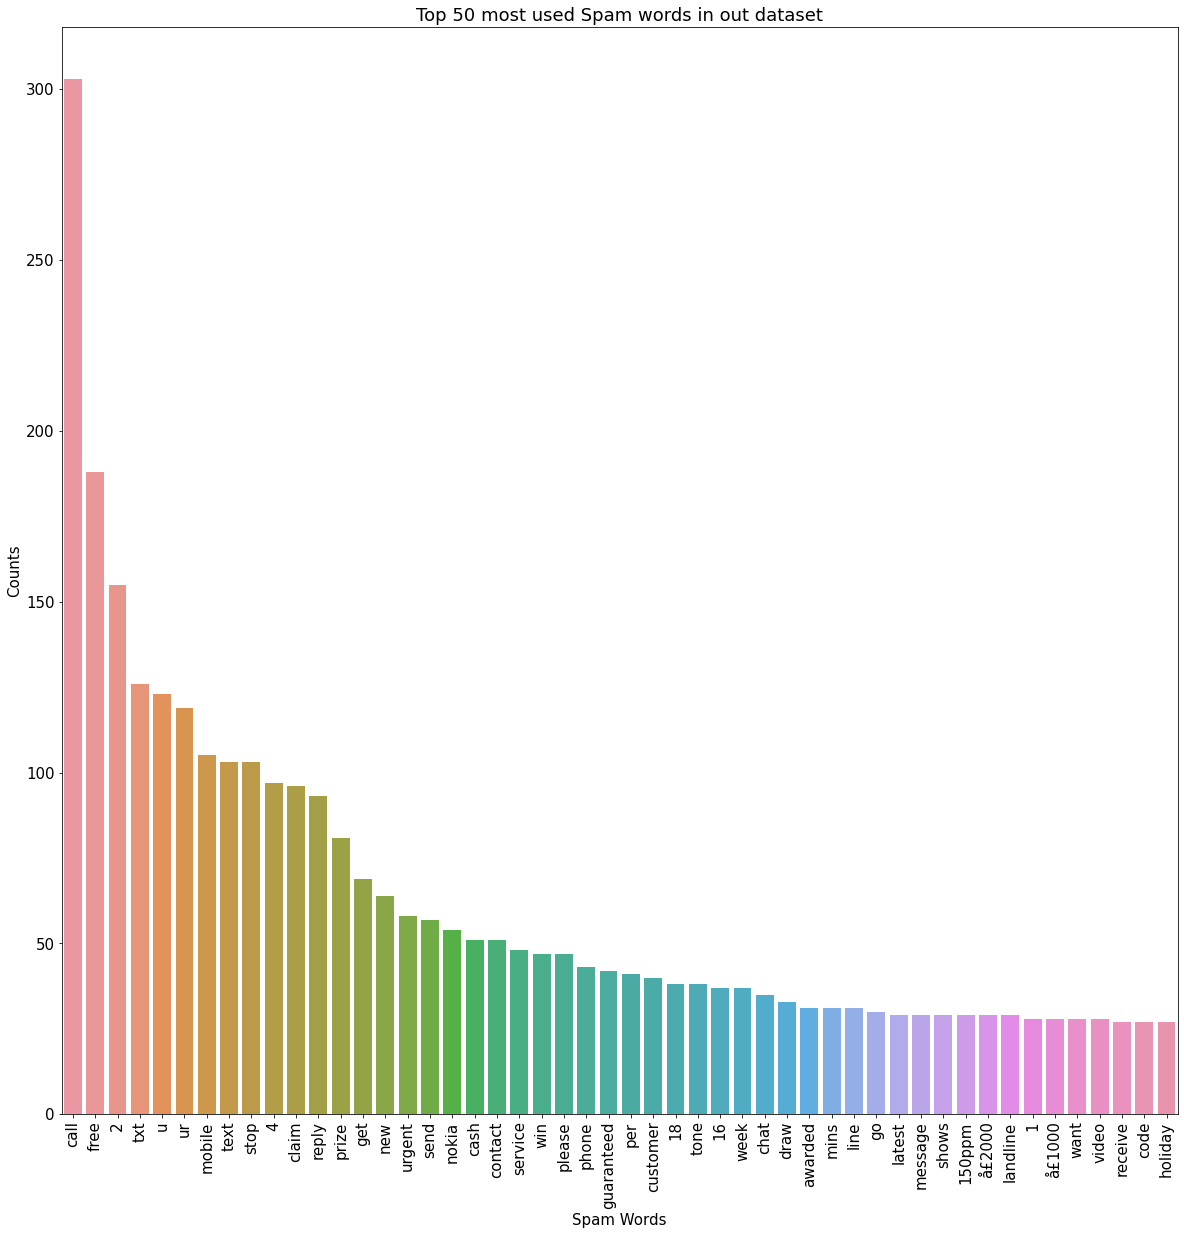

In [42]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size':15})
sns.barplot(x=pd.DataFrame(Counter(spam_text_without_stopwords).most_common(50))[0],y=pd.DataFrame(Counter(spam_text_without_stopwords).most_common(50))[1])
plt.xticks(rotation = 90)
plt.title('Top 50 most used Spam words in out dataset')
plt.xlabel('Spam Words')
plt.ylabel('Counts')
plt.show()

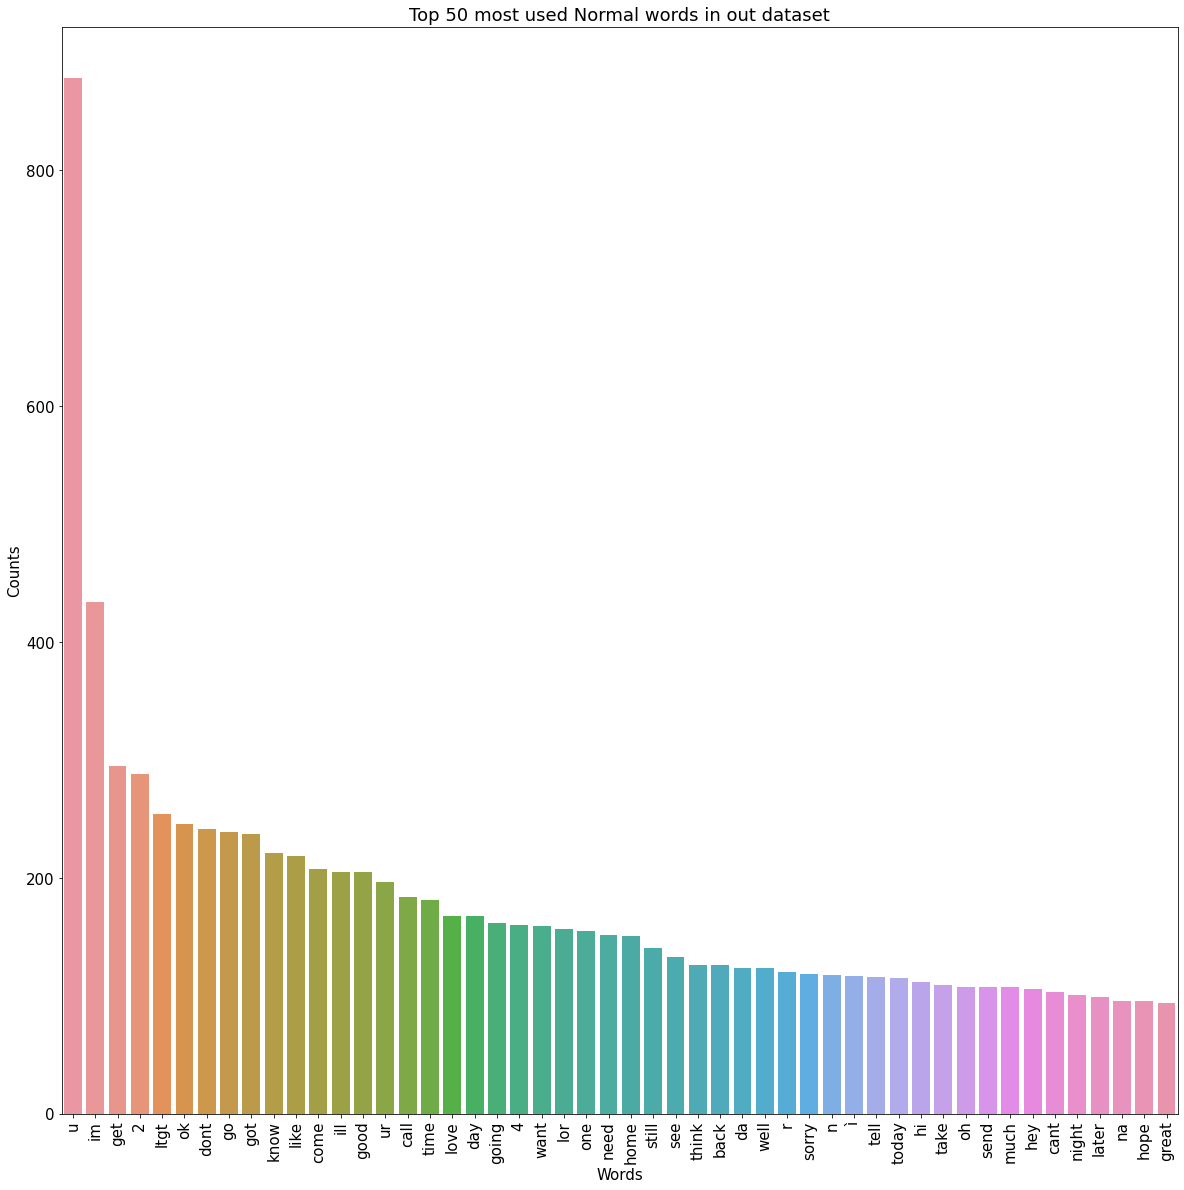

In [43]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size':15})
sns.barplot(x=pd.DataFrame(Counter(not_spam_text_without_stopwords).most_common(50))[0],y=pd.DataFrame(Counter(not_spam_text_without_stopwords).most_common(50))[1])
plt.xticks(rotation = 90)
plt.title('Top 50 most used Normal words in out dataset')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

## Model

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = CountVectorizer()
tfidf = TfidfVectorizer()
#X = vectorizer.fit_transform(sms['cleaned_text']).toarray()
X = tfidf.fit_transform(sms['cleaned_text']).toarray()

In [45]:
X.shape

(5169, 8034)

In [46]:
y = sms['spam'].values

In [47]:
y.shape

(5169,)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

Accuracy Score :  0.8781431334622823
Precision Score :  0.548936170212766


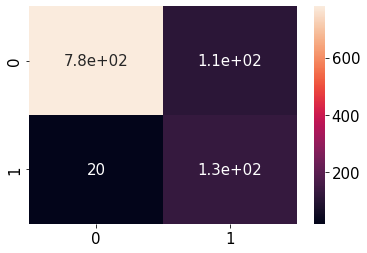

In [50]:
gb.fit(X_train,y_train)
y_pred1 = gb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred1))
print('Precision Score : ',precision_score(y_test,y_pred1))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)
plt.show()

Accuracy Score :  0.9448742746615088
Precision Score :  1.0


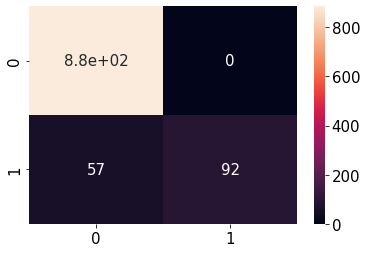

In [51]:
mb.fit(X_train,y_train)
y_pred2 = mb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred2))
print('Precision Score : ',precision_score(y_test,y_pred2))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.show()

Accuracy Score :  0.9642166344294004
Precision Score :  0.9745762711864406


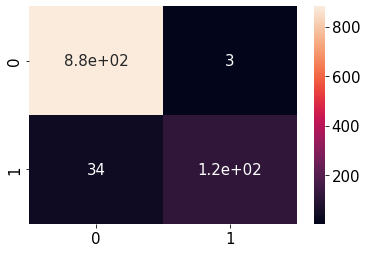

In [52]:
bb.fit(X_train,y_train)
y_pred3 = bb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred3))
print('Precision Score : ',precision_score(y_test,y_pred3))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True)
plt.show()

In [53]:
# lets check another classification algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier

In [54]:
!pip install xgboost

In [55]:
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc  = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
classifiers = {
    'SVC': svc,
    'KNC': knc,
    'MNC_NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'XGBC' : xgbc
}

In [58]:
def train_classifier(classifier,X_train,y_train,X_test,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.title('Classifier object : {}\n'.format(classifier))
    plt.show()
    return accuracy,precision
    

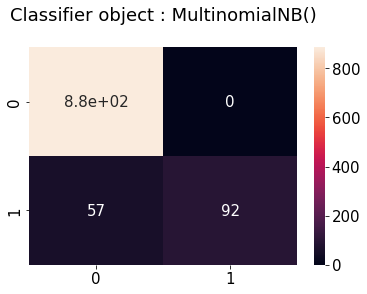

(0.9448742746615088, 1.0)

In [59]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

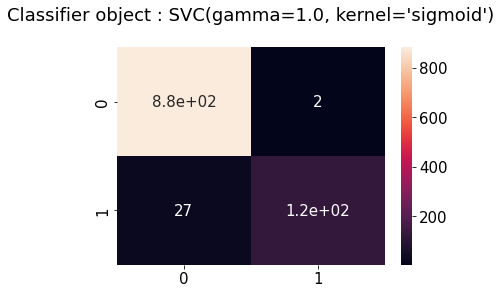

Classifier name :  SVC
Accuracy Score :  0.971953578336557
Precision Score :  0.9838709677419355


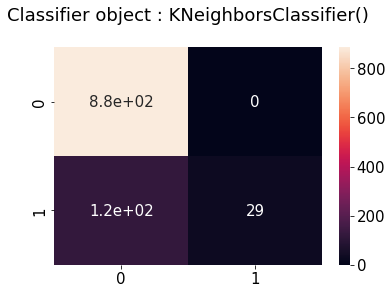

Classifier name :  KNC
Accuracy Score :  0.8839458413926499
Precision Score :  1.0


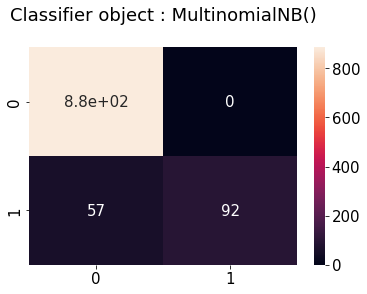

Classifier name :  MNC_NB
Accuracy Score :  0.9448742746615088
Precision Score :  1.0


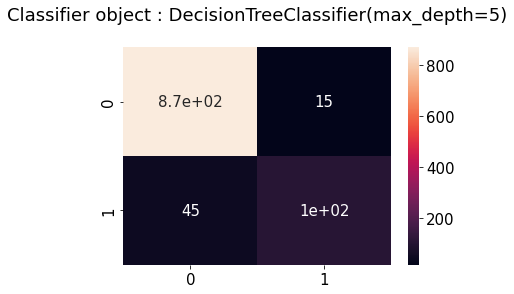

Classifier name :  DT
Accuracy Score :  0.941972920696325
Precision Score :  0.8739495798319328


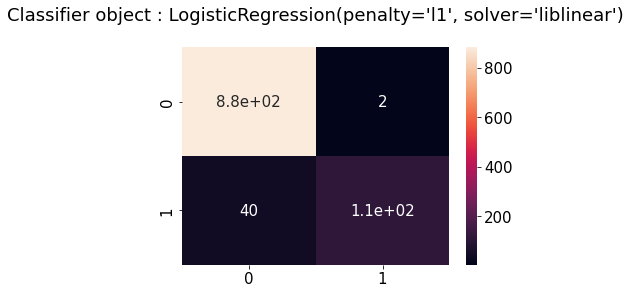

Classifier name :  LR
Accuracy Score :  0.9593810444874274
Precision Score :  0.9819819819819819


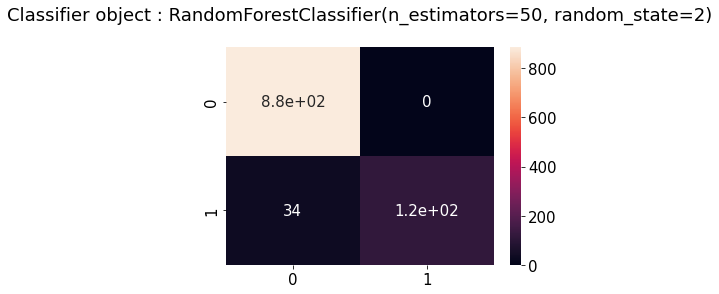

Classifier name :  RF
Accuracy Score :  0.9671179883945842
Precision Score :  1.0


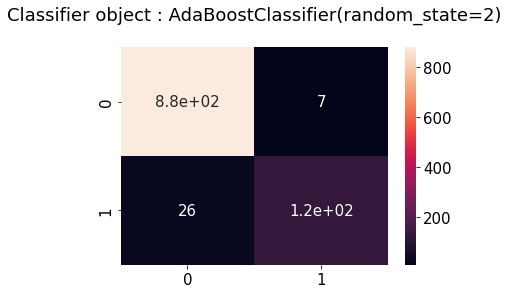

Classifier name :  AdaBoost
Accuracy Score :  0.9680851063829787
Precision Score :  0.9461538461538461


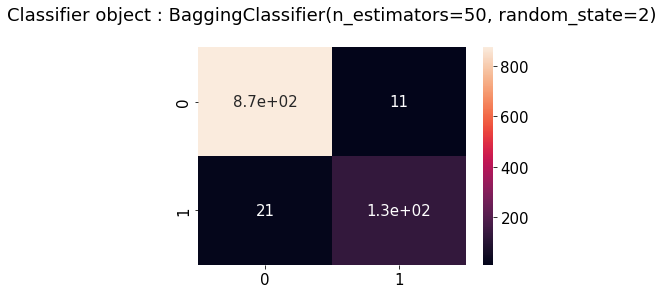

Classifier name :  Bgc
Accuracy Score :  0.9690522243713733
Precision Score :  0.920863309352518


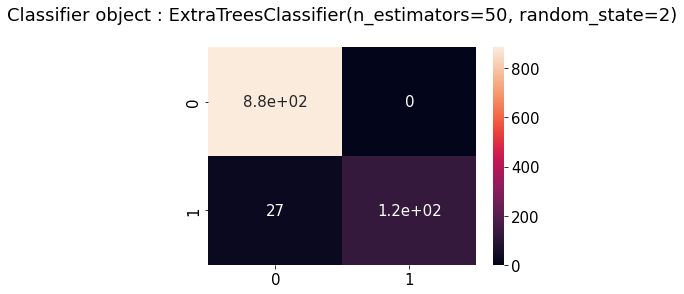

Classifier name :  ETC
Accuracy Score :  0.9738878143133463
Precision Score :  1.0


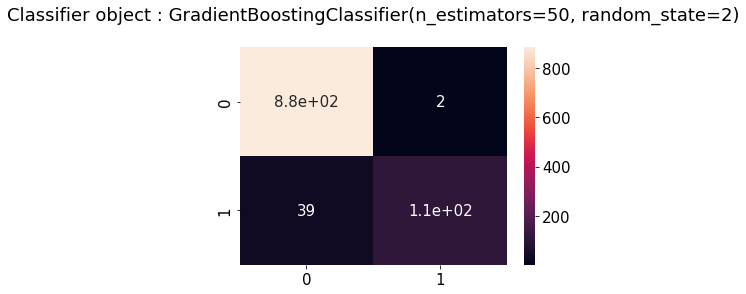

Classifier name :  GBC
Accuracy Score :  0.960348162475822
Precision Score :  0.9821428571428571


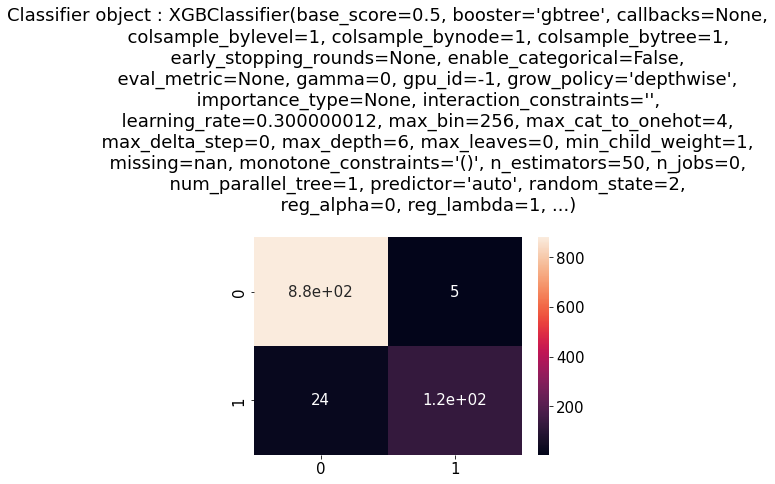

Classifier name :  XGBC
Accuracy Score :  0.971953578336557
Precision Score :  0.9615384615384616


In [60]:
accuracy = []
precision = []
for name,classifier in classifiers.items():
    current_accuracy,current_precision = train_classifier(classifier,X_train,y_train,X_test,y_test)
    print('Classifier name : ',name)
    print('Accuracy Score : ',current_accuracy)
    print('Precision Score : ',current_precision)
    
    accuracy.append(current_accuracy)
    precision.append(current_precision)

In [61]:
performance_df = pd.DataFrame({'Classifier Name(Algorithm)': classifiers.keys(),'Accuracy': accuracy,'Precision': precision})

In [62]:
performance_df

,Classifier Name(Algorithm),Accuracy,Precision
0,SVC,0.971954,0.983871
1,KNC,0.883946,1.000000
2,MNC_NB,0.944874,1.000000
3,DT,0.941973,0.873950
4,LR,0.959381,0.981982
5,RF,0.967118,1.000000
6,AdaBoost,0.968085,0.946154
7,Bgc,0.969052,0.920863
8,ETC,0.973888,1.000000
9,GBC,0.960348,0.982143


In [63]:
performance_df.sort_values('Precision',ascending=False).head().sort_values('Accuracy',ascending=False)

,Classifier Name(Algorithm),Accuracy,Precision
8,ETC,0.973888,1.000000
0,SVC,0.971954,0.983871
5,RF,0.967118,1.000000
2,MNC_NB,0.944874,1.000000
1,KNC,0.883946,1.000000


In [64]:
performance_df_melted = pd.melt(performance_df,id_vars='Classifier Name(Algorithm)')

In [65]:
performance_df_melted

,Classifier Name(Algorithm),variable,value
0,SVC,Accuracy,0.971954
1,KNC,Accuracy,0.883946
2,MNC_NB,Accuracy,0.944874
3,DT,Accuracy,0.941973
4,LR,Accuracy,0.959381
5,RF,Accuracy,0.967118
6,AdaBoost,Accuracy,0.968085
7,Bgc,Accuracy,0.969052
8,ETC,Accuracy,0.973888
9,GBC,Accuracy,0.960348


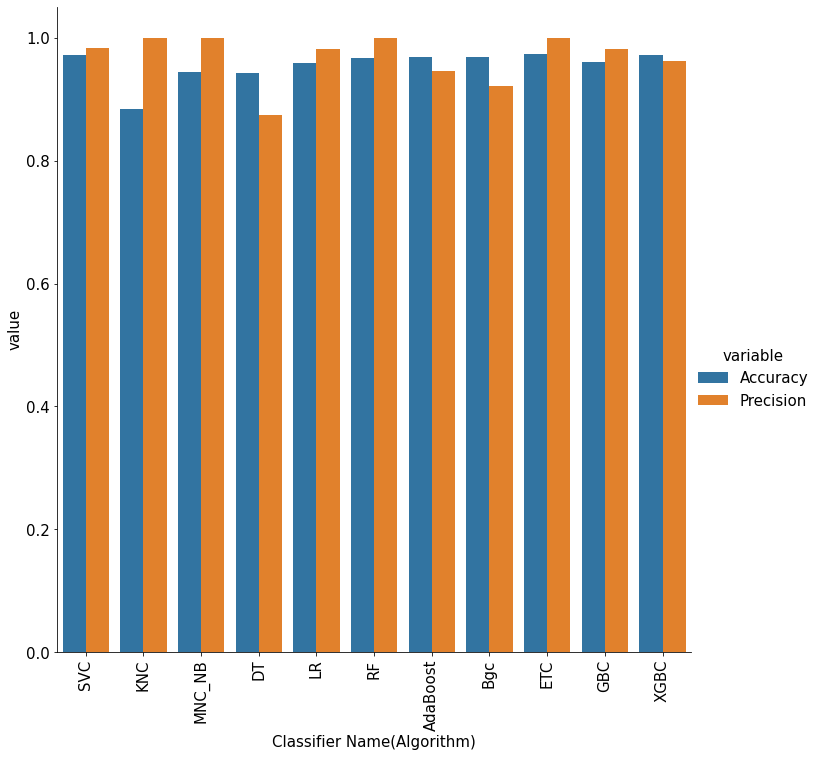

In [66]:
sns.catplot(x='Classifier Name(Algorithm)',y='value',hue='variable',data=performance_df_melted,kind='bar',height=10)
plt.xticks(rotation=90)
plt.show()

In [67]:
# Lets try to improve our model 
# lets try voting classifier

from sklearn.ensemble import VotingClassifier
svc_new = SVC(kernel='sigmoid',gamma=1.0,probability=True)
voting = VotingClassifier(estimators=[('ETC',etc),('RF',rfc),('MNB',mnb)],voting='soft')

In [68]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('MNB', MultinomialNB())],
                 voting='soft')

Accuracy Score :  0.9671179883945842
Precision Score :  1.0


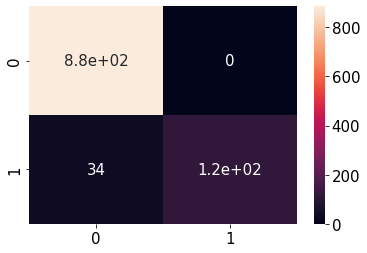

In [69]:
y_predict= voting.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_predict))
print('Precision Score : ',precision_score(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

In [70]:
# lets try stacking
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=[('MNB',mnb),('SVC',svc_new),('RF',rfc)], final_estimator= ExtraTreesClassifier(n_estimators=50,random_state=2))

In [71]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('MNB', MultinomialNB()),
                               ('SVC',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('RF',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2))],
                   final_estimator=ExtraTreesClassifier(n_estimators=50,
                                                        random_state=2))

Accuracy Score :  0.9845261121856866
Precision Score :  0.9784172661870504


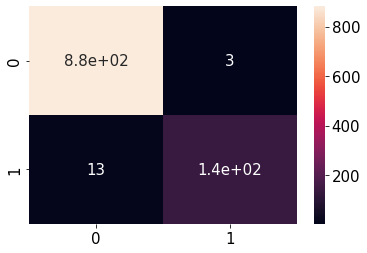

In [72]:
y_predict_1 = clf.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_predict_1))
print('Precision Score : ',precision_score(y_test,y_predict_1))
sns.heatmap(confusion_matrix(y_test,y_predict_1),annot=True)
plt.show()